In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("us2022q2a.csv")
df_additional = pd.read_csv("usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [51]:
df.isna().sum()

firm                          1
q                             1
revenue                  165833
cogs                     166138
sgae                     166138
otheropexp               166136
extraincome              165834
finexp                   165833
incometax                165833
totalassets              164639
totalliabilities         164639
shortdebt                194770
longdebt                 164852
stockholderequity        164707
adjprice                 165293
originalprice            165213
sharesoutstanding        166625
fiscalmonth              164633
year                          1
cto                           1
Name                        631
Sector NAICS\nlevel 1       631
dtype: int64

In [52]:
df.dropna(inplace=True)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000.0,1406000.0,1.038000e+06,0.0,273000.000000,0.000,115000.0,9080000.000,...,0.000,5616000.000,19.925522,32.5000,457072.749,6.0,2001.0,2.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [53]:
df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm', 'qdate'], inplace=True)

In [54]:
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df[['q', 'adjprice', 'lprice']]

q   adjprice     lprice
firm qdate                               
A    2000Q2  2000q2  45.215607        NaN
     2000Q3  2000q3  30.003238        NaN
     2000Q4  2000q4  33.566841        NaN
     2001Q1  2001q1  18.840347        NaN
     2001Q2  2001q2  19.925522  45.215607
...             ...        ...        ...
ZYNE 2021Q2  2021q2   5.290000   3.370000
     2021Q3  2021q3   4.240000   3.310000
     2021Q4  2021q4   2.880000   3.300000
     2022Q1  2022q1   2.050000   4.650000
     2022Q2  2022q2   1.140000   5.290000

[123140 rows x 3 columns]

In [55]:
df["bookvalue"] = df["totalassets"] - df["totalliabilities"]
df["marketvalue"] = df["originalprice"] * df["sharesoutstanding"]
df[["Sector NAICS\nlevel 1", "bookvalue", "marketvalue"]]

Sector NAICS\nlevel 1    bookvalue   marketvalue
firm qdate                                                  
A    2000Q2         Manufacturing  4642000.000  3.335506e+07
     2000Q3         Manufacturing  4902000.000  2.216940e+07
     2000Q4         Manufacturing  5265000.000  2.498606e+07
     2001Q1         Manufacturing  5541000.000  1.403653e+07
     2001Q2         Manufacturing  5616000.000  1.485486e+07
...                           ...          ...           ...
ZYNE 2021Q2         Manufacturing    87699.257  2.182206e+05
     2021Q3         Manufacturing    78686.999  1.749065e+05
     2021Q4         Manufacturing    70913.334  1.187065e+05
     2022Q1         Manufacturing    65166.970  8.701643e+04
     2022Q2         Manufacturing    57241.873  4.969939e+04

[123140 rows x 3 columns]

In [56]:
df["operatingmargin"] = df["revenue"] - df["cogs"] - df["sgae"]
df[["Sector NAICS\nlevel 1", "operatingmargin"]]

Sector NAICS\nlevel 1  operatingmargin
firm qdate                                        
A    2000Q2         Manufacturing      214000.0000
     2000Q3         Manufacturing      210000.0000
     2000Q4         Manufacturing      458000.0000
     2001Q1         Manufacturing      279000.0000
     2001Q2         Manufacturing      -62000.0000
...                           ...              ...
ZYNE 2021Q2         Manufacturing       -9838.4941
     2021Q3         Manufacturing      -10210.6520
     2021Q4         Manufacturing       -8836.4365
     2022Q1         Manufacturing       -8903.9150
     2022Q2         Manufacturing       -9168.7695

[123140 rows x 2 columns]

In [57]:
firms_last_quarter = df.groupby(["firm"]).last()
firms_last_quarter

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,lprice,bookvalue,marketvalue,operatingmargin
firm,,,,,,,,,,,,,,,,,,,,,
A,2022q2,1607000.0,746000.0,5.010000e+05,0.0,-7000.00000,20000.000,59000.0,1.045500e+07,5.333000e+06,...,298708.056,6.0,2022.0,2.0,"Agilent Technologies, Inc",Manufacturing,146.747733,5122000.000,3.547756e+07,3.600000e+05
AA,2022q2,3644000.0,2767000.0,2.200000e+05,-75000.0,81000.00000,30000.000,234000.0,1.570900e+07,8.417000e+06,...,184448.686,6.0,2022.0,2.0,Alcoa Corp,Manufacturing,36.582200,7292000.000,8.407171e+06,6.570000e+05
AAL,2022q2,13422000.0,0.0,1.240500e+07,0.0,25000.00000,439000.000,127000.0,6.796300e+07,7.638500e+07,...,649514.848,6.0,2022.0,2.0,American Airlines Group Inc,Transportation and Warehousing,21.210000,-8422000.000,8.235848e+06,1.017000e+06
AAOI,2022q2,52299.0,43671.0,2.152700e+04,0.0,-180.00000,1377.000,0.0,4.347550e+05,2.151610e+05,...,27634.082,6.0,2022.0,2.0,"Applied Optoelectronics, Inc",Manufacturing,8.470000,219594.000,4.283283e+04,-1.289900e+04
AAON,2022q2,208814.0,161438.0,2.693300e+04,-10.0,220.00000,550.000,4177.0,7.767120e+05,2.862060e+05,...,53071.178,6.0,2022.0,2.0,"Aaon, Inc",Manufacturing,62.220099,490506.000,2.906178e+06,2.044300e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022q2,45542.0,28168.0,2.407400e+04,8043.0,3662.00000,0.000,9.0,1.127380e+05,2.553900e+04,...,67209.461,6.0,2022.0,2.0,Zevia Pbc,Manufacturing,NaN,87199.000,1.888586e+05,-6.700000e+03
ZVO,2022q2,51380.0,34995.0,2.610800e+04,-8882.0,-3824.00000,0.000,8.0,8.543300e+04,7.882800e+04,...,34095.968,6.0,2022.0,2.0,Zovio Inc,Educational Services,2.590000,6605.000,3.307650e+04,-9.723000e+03
ZWS,2022q2,284200.0,170400.0,6.000000e+04,300.0,-600.00000,5200.000,11300.0,1.176300e+06,9.469000e+05,...,125967.533,6.0,2022.0,2.0,Zurn Elkay Water Solutions Corp,Manufacturing,24.761709,229400.000,3.431356e+06,5.380000e+04


In [58]:
#Show how many firms by industry there are in the sample
industries_last_quarter = firms_last_quarter.groupby("Sector NAICS\nlevel 1")
industries_last_quarter["Sector NAICS\nlevel 1"].count().sort_values(ascending=False)

Sector NAICS\nlevel 1
Manufacturing                                                               1530
Information                                                                  260
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             144
Finance and Insurance                                                        140
Administrative and Support and Waste Management and Remediation Services     130
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               66
Health Care and Social Assistance                                             64
Constr

In [59]:
#For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?
firms_last_quarter["bookvalue"] = firms_last_quarter["totalassets"] - firms_last_quarter["totalliabilities"]
firms_last_quarter["marketvalue"] = firms_last_quarter["originalprice"] * firms_last_quarter["sharesoutstanding"]
firms_last_quarter[["Sector NAICS\nlevel 1", "bookvalue", "marketvalue"]]

,Sector NAICS\nlevel 1,bookvalue,marketvalue
firm,,,
A,Manufacturing,5122000.000,3.547756e+07
AA,Manufacturing,7292000.000,8.407171e+06
AAL,Transportation and Warehousing,-8422000.000,8.235848e+06
AAOI,Manufacturing,219594.000,4.283283e+04
AAON,Manufacturing,490506.000,2.906178e+06
...,...,...,...
ZVIA,Manufacturing,87199.000,1.888586e+05
ZVO,Educational Services,6605.000,3.307650e+04
ZWS,Manufacturing,229400.000,3.431356e+06


In [60]:
firms_last_quarter.groupby("Sector NAICS\nlevel 1")["bookvalue"].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,66.0,4.376664e+05,2.446652e+06,-8658900.0,1.324508e+04,2.274610e+05,600194.50,7289000.0
Administrative and Support and Waste Management and Remediation Services,130.0,2.699966e+06,7.168452e+06,-1026446.0,7.763000e+04,5.250860e+05,1855890.75,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1.068506e+06,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,7.616800e+04,1678528.00,96433000.0
Construction,44.0,2.533252e+06,4.272329e+06,83162.0,4.109848e+05,9.981465e+05,2585043.50,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,6.496990e+05,966118.00,4322243.0
Finance and Insurance,140.0,4.874033e+06,1.049381e+07,-5438611.0,3.415530e+05,1.156818e+06,4126307.50,76205000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,4.440655e+05,1161768.25,10400700.0
Information,260.0,4.026827e+06,1.675064e+07,-5768000.0,1.353823e+05,4.828245e+05,1306655.25,166542000.0


array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

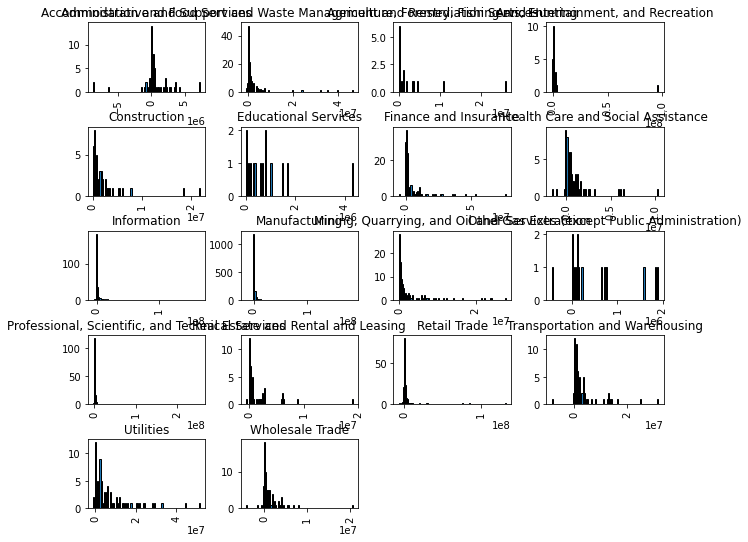

In [61]:
# n = len(firms_last_quarter.groupby("Sector NAICS\nlevel 1").count().index)
firms_last_quarter["bookvalue"].hist(by=firms_last_quarter["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=100)

In [62]:
firms_last_quarter.groupby("Sector NAICS\nlevel 1")["marketvalue"].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,66.0,9.013757e+06,2.559260e+07,11047.311660,2.998144e+05,1.434429e+06,5.384146e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,130.0,1.398184e+07,4.492164e+07,6078.575024,5.285672e+05,2.032185e+06,6.482678e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,22188.918000,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7425.361076,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,44.0,3.940954e+06,5.683502e+06,20269.583260,6.543235e+05,1.900822e+06,3.874364e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,33076.498557,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,140.0,1.452031e+07,4.552555e+07,12450.765460,5.913862e+05,2.697928e+06,9.830132e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,10153.060460,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07
Information,260.0,1.932010e+07,1.223585e+08,10941.657291,7.279416e+05,2.546684e+06,7.757159e+06,1.920840e+09


array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

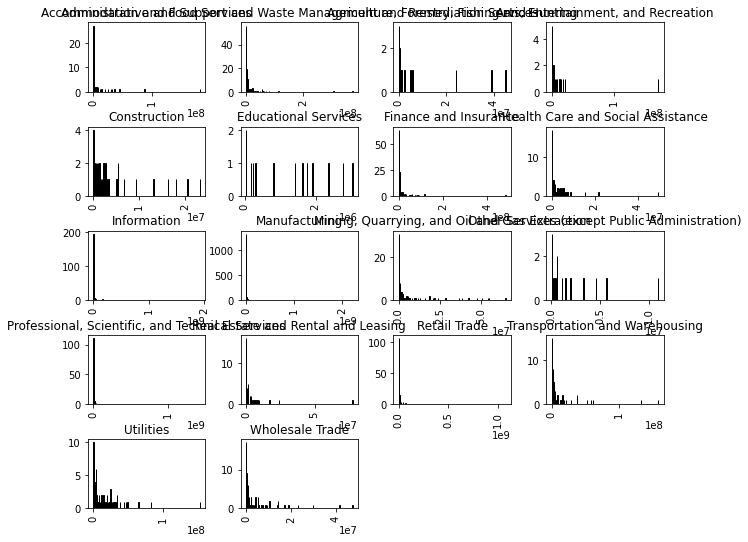

In [63]:
firms_last_quarter["marketvalue"].hist(by=firms_last_quarter["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=250)

In [64]:
#SE PUEDE VER EN LAS INDUSTRIAS CON UN BUEN NÚMERO DE EMPRESAS QUE EN LAS DOS MÉTRICAS TIENEN UNA DISTRIBUCIÓN NORMAL SESGADA A LA DERECHA. POR ESTA MISMA RAZÓN, SE TIENE UNA IDEA MÁS CLARA DE LA EMPRESA TÍPICA SI NOS BASAMOS EN LA MEDIANA EN VEZ DE LA MEDIA. EN BOOK VALUE SE PUEDE VER QUE LA EMPRESA TÍPICA DE CUALQUIER INDUSTRIA ESTÁ ENTRE CIEN MIL Y MIL MILLONES (CURIOSAMENTE ARTES ES UN VALOR ATÍPICO CON APROXIMADAMENTE 70 MILLONES, PROBABLEMENTE POR NO CONTAR CON BASTANTES ACTIVOS) Y EN MARKET VALUE ENTRE 500 MILLONES Y 6 MIL MILLONES.

In [65]:
#For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.
df.groupby("firm")["operatingmargin"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,131701.149425,2.005156e+05,-658000.000,95000.0000,191000.0000,2.375000e+05,458000.000
AA,23.0,386217.391304,2.360907e+05,15000.000,187000.0000,337000.0000,5.700000e+05,899000.000
AAL,35.0,385457.142857,1.338317e+06,-2871000.000,403000.0000,730000.0000,1.224000e+06,1999000.000
AAOI,35.0,-1828.542857,1.240916e+04,-17794.000,-12588.0000,-1316.0000,4.321500e+03,34265.000
AAON,44.0,16720.681818,5.611170e+03,3022.000,14213.7500,17326.5000,2.012225e+04,27733.000
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-6166.250000,2.050803e+03,-8654.000,-7188.5000,-6122.0000,-5.099750e+03,-3767.000
ZVO,44.0,10365.545455,2.425531e+04,-14935.000,-7182.5000,2517.0000,1.528125e+04,87867.000
ZWS,41.0,64063.414634,3.982466e+04,-165100.000,56900.0000,68500.0000,7.920000e+04,104700.000


firm
A       AxesSubplot(0.125,0.125;0.775x0.755)
AA      AxesSubplot(0.125,0.125;0.775x0.755)
AAL     AxesSubplot(0.125,0.125;0.775x0.755)
AAOI    AxesSubplot(0.125,0.125;0.775x0.755)
AAON    AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
ZVIA    AxesSubplot(0.125,0.125;0.775x0.755)
ZVO     AxesSubplot(0.125,0.125;0.775x0.755)
ZWS     AxesSubplot(0.125,0.125;0.775x0.755)
ZY      AxesSubplot(0.125,0.125;0.775x0.755)
ZYNE    AxesSubplot(0.125,0.125;0.775x0.755)
Name: operatingmargin, Length: 2969, dtype: object

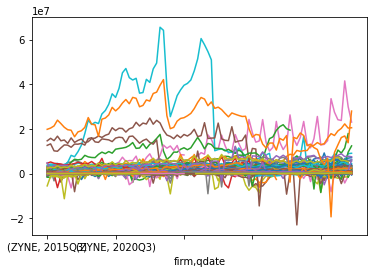

In [71]:
df.groupby("firm")["operatingmargin"].plot(x="qdate")

In [ ]:
#SE PUEDE VER COMO EL OPERATING MARGIN CASI SIEMPRE ESTÁ EN EL LADO POSITIVO Y CASI SIEMPRE CERCA DEL 0 (CON ALGUNAS POCAS EXCEPCIONES). SE PUEDE NOTAR QUE SE REPITE LA DISTRIBUCIÓN NORMAL SESGADA A LA DERECHA DE LOS PARAMETROS ANTERIORES PORQUE LA GRAN MAYORÍA DE LOS DATOS ESTÁN EN LOS RANGOS INFERIORES PERO HAY ALGUNOS OUTLIERS EN EL RANGO SUPERIOR.

In [86]:
#Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?
sorted_market_value = firms_last_quarter.sort_values(by=["marketvalue"], ascending=False)
top_ten_market_value = sorted_market_value.head(10)["marketvalue"]
top_ten_market_value

firm
AAPL     2.212838e+09
MSFT     1.920840e+09
GOOGL    1.435042e+09
AMZN     1.080624e+09
TSLA     6.976698e+08
UNH      4.818731e+08
JNJ      4.671001e+08
META     4.363946e+08
NVDA     3.789750e+08
V        3.743426e+08
Name: marketvalue, dtype: float64

<AxesSubplot:>

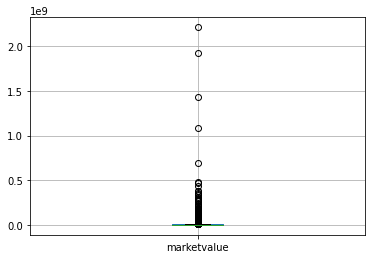

In [83]:
firms_last_quarter.boxplot(column=["marketvalue"])

In [87]:
firms_last_quarter["marketvalue"].describe()

count    2.969000e+03
mean     1.184380e+07
std      7.178993e+07
min      3.490000e+01
25%      1.697871e+05
50%      1.105860e+06
75%      4.771844e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

In [88]:
(top_ten_market_value - firms_last_quarter["marketvalue"].median()) / firms_last_quarter["marketvalue"].std()

firm
AAPL     30.808390
MSFT     26.740997
GOOGL    19.974064
AMZN     15.037182
TSLA      9.702809
UNH       6.696862
JNJ       6.491082
META      6.063368
NVDA      5.263540
V         5.199013
Name: marketvalue, dtype: float64

In [ ]:
#EL VALOR DEL TOP 5 ESTÁ ARRIBA DE 10 DESVIACIONES ESTÁNDAR, CONSIDERANDO QUE EN LA DISTRIBUCIÓN NORMAL 3 DESVIACIONES ESTÁNDAR DE ARRIBA Y ABAJO SON EL 99.73%, ESTAS EMPRESAS SON TOTALMENTE FUERA DE SERIE EN LA INDUSTRIA

In [89]:
#Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?
sorted_book_value = firms_last_quarter.sort_values(by=["bookvalue"], ascending=False)
top_ten_book_value = sorted_book_value.head(10)["bookvalue"]
top_ten_book_value

firm
GOOGL    255419000.0
XOM      184508000.0
MSFT     166542000.0
CVX      154562000.0
T        135307000.0
AMZN     131402000.0
META     125767000.0
INTC     101218000.0
DIS       96433000.0
CMCSA     92559000.0
Name: bookvalue, dtype: float64

<AxesSubplot:>

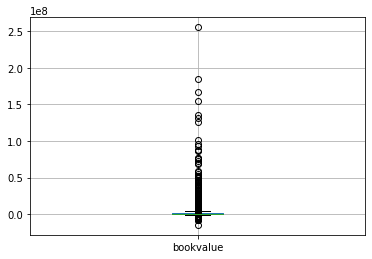

In [91]:
firms_last_quarter.boxplot(column=["bookvalue"])

In [92]:

firms_last_quarter["bookvalue"].describe()

count    2.969000e+03
mean     2.810302e+06
std      1.124976e+07
min     -1.479100e+07
25%      7.134500e+04
50%      3.755530e+05
75%      1.488700e+06
max      2.554190e+08
Name: bookvalue, dtype: float64

In [95]:
(top_ten_book_value - firms_last_quarter["bookvalue"].median()) / firms_last_quarter["bookvalue"].std()

firm
GOOGL    22.671018
XOM      16.367682
MSFT     14.770669
CVX      13.705758
T        11.994165
AMZN     11.647046
META     11.146147
INTC      8.963966
DIS       8.538624
CMCSA     8.194261
Name: bookvalue, dtype: float64

In [ ]:
#SE PUEDE NOTAR QUE BOOKVALUE TIENE LOS VALORES MÁXIMOS A MENOS DESVIACIONES ESTÁNDAR, TAMBIÉN SE PUEDE NOTAR QUE LOS VALORES ESTÁN MÁS JUNTOS POR LO QUE TAL VEZ ESTÁ MENOS SESGADA A LA DERECHA. LA EXPLICACIÓN PROBABLE DE ESTO ES QUE LOS VALORES DE LIBRO SON MÁS ESTÁTICOS COMPARADOS CON LAS ACCIONES QUE PUEDEN SER MÁS VOLÁTILES